<a href="https://colab.research.google.com/github/aditigedam/ML/blob/main/missile_parts_teachable_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://drive.google.com/drive/folders/1aXtAD-dgV_VEl7reV4NYCdbRMuwZ11ja?usp=sharing
https://colab.research.google.com/drive/1wufrh1RZyNYNoXTTRb4NtMcILQ5LsGs3

In [ ]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

# Load the model
model = load_model('/content/drive/MyDrive/missile-dataset/keras_model.h5')

In [ ]:
urls = "/content/drive/MyDrive/missile-dataset/test_images"

In [ ]:
import glob

In [ ]:
test_data = []
for name in glob.glob("/content/drive/MyDrive/missile-dataset/test_images/*"):
  test_data.append(name)

In [ ]:
test_data

In [ ]:
data = np.ndarray(shape=(len(test_data), 224, 224, 3), dtype=np.float32)
i=0
for path in test_data:
  try:
    image = Image.open(path)
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.ANTIALIAS)
    image_array = np.asarray(image)
    normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
    data[i] = normalized_image_array
    i=i+1
  except:
    "ERROR"

In [ ]:
data

In [ ]:
from keras.preprocessing.image import load_img ,array_to_img, img_to_array

In [ ]:
prediction = model.predict(data)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
class_names = {
0: "tanks",
1:"fuse",
2:"barrel",
3:"shell"
}


In [ ]:
class_names[2]

'barrel'

In [ ]:
prediction

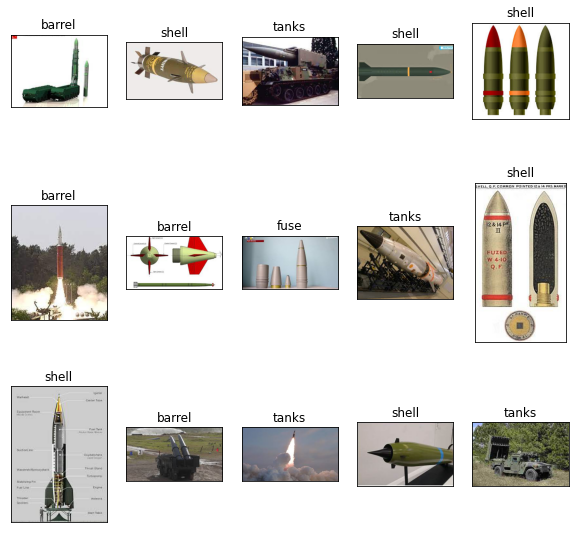

In [ ]:
fig = plt.figure(figsize=(10,10))
row =3
col = 5
for i in range(15):
  axes = fig.add_subplot(row, col, i+1)
  img = load_img(test_data[i])
  plt.imshow(img)
  axes.get_xaxis().set_visible(False)
  axes.get_yaxis().set_visible(False)
  max_val =0
  # print(prediction[i])
  for l in range(4):
    if prediction[i][l] > prediction[i][max_val]:
      max_val = l

  axes.set_title(class_names[max_val])